# Bergen geo  (under construction)

Modified from https://nbviewer.jupyter.org/github/jwass/mplleaflet/blob/master/examples/NYC%20Boroughs.ipynb

See also "Working with Spatio-temporal data in Python" ([here](https://annefou.github.io/metos_python), 
thanks to [Anne Fouilloux](https://www.mn.uio.no/geo/english/people/adm/annefou), UiO) <br>
and "Interactive GIS in Jupyter" [[here](https://blog.jupyter.org/interactive-gis-in-jupyter-with-ipyleaflet-52f9657fa7a)]

This example will demonstrate using [GeoPandas](https://github.com/geopandas/geopandas) to load and plot some polygons representing the New York City boroughs. Then we'll put it into a Leaflet map right in the notebook using [mplleaflet](https://github.com/jwass/mplleaflet).

`Norway_places.zip` [ArcGIS](https://en.wikipedia.org/wiki/ArcGIS) shapefile is derived from OpenStreetMap.org. OpenStreetMap is open data, licensed under the Open Data Commons Open Database License (ODbL). They are made available [here](https://mapcruzin.com/free-norway-arcgis-maps-shapefiles.htm) by MapCruzin.<br>

Data from https://data.cityofnewyork.us/dataset/nybb/gtgn-npft  Export -> Download -> Shapefile -> nybb.zip

_Uncomment the following cell to install additional geo-packages for this notebook_.

You might also need to install `libgeos`, e.g. using Ubuntu:
```
sudo apt update
sudo apt install libgeos-dev
```


In [11]:
#import sys
#!{sys.executable} -m pip install geopandas
#!{sys.executable} -m pip install geoplot
#import geopandas
#import geoplot
#print(f"geopandas version: {geopandas.__version__}")
#print(f"geoplot version: {geopandas.__version__}")

In [12]:
%matplotlib inline
import os
import matplotlib.pyplot as plt
import geopandas as gpd
import geoplot as gplt
import geoplot.crs as gcrs
#import mplleaflet

In [14]:
#zipfile = 'zip://%s/data/nybb.zip' % os.getcwd()
zipfile = '%s/data/Norway_places.zip' % os.getcwd()
print(zipfile)
df = gpd.read_file(zipfile)

/home/arvid/GitHub/computational-medicine/BMED360-2021/Outbreak-Science-Extra/geo/data/Norway_places.zip


In [15]:
df

,osm_id,name,type,population,geometry
0,149514,Gol,village,0,POINT (8.94366 60.70161)
1,8087631,Halhjem,hamlet,0,POINT (5.42636 60.14552)
2,20910629,TromsÃ¸,city,66003,POINT (18.95180 69.66699)
3,20981158,Oslo,city,0,POINT (10.73912 59.91326)
4,20981180,Narvik,town,0,POINT (17.42665 68.43968)
...,...,...,...,...,...
2611,436627947,Starhellinga,village,0,POINT (11.26458 60.72655)
2612,436628011,Gata,village,0,POINT (11.34440 60.68527)
2613,436628297,Romedal,village,0,POINT (11.29308 60.73704)
2614,436628349,Fredsvollfeltet,village,0,POINT (11.28338 60.74913)


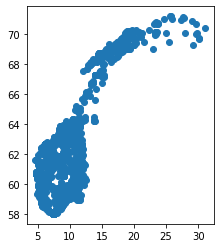

In [16]:
ax = df.plot()

In [17]:
df.loc[df['name'] == 'Bergen']

,osm_id,name,type,population,geometry
5,21261083,Bergen,city,250000,POINT (5.32890 60.39348)


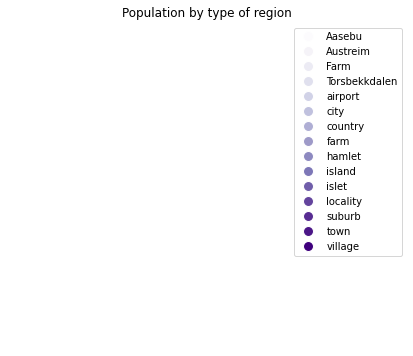

In [18]:
# To be completed

gplt.choropleth(
    df,
    hue='type',
    cmap='Purples', linewidth=0.5,
    edgecolor='white',
    legend=True,
    projection=gcrs.AlbersEqualArea(central_latitude=5.32890, central_longitude=5.32890)
)
plt.title("Population by type of region")
plt.show()

## $\rightarrow$ Your turn

Based of the following two examples: (**i**) Percentage white residents in N.Y.C, and (**ii**) Choropleth of parking tickets issued to state by precinct in NYC,<br> _Ty to make relevant plots from Norway, or a subregion (e.g. Bergen or Vestland), related to a pandemic outbreak_

### (i) Percentage white residents in NYC

(cfr. https://residentmario.github.io/geoplot/gallery/plot_ny_state_demographics.html)

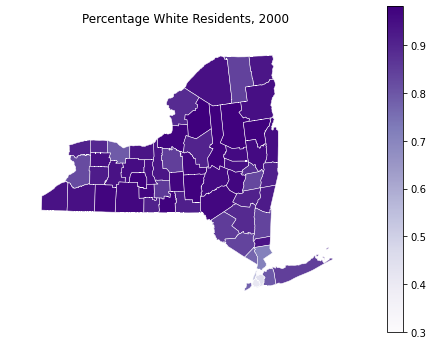

In [19]:
ny_census_tracts = gpd.read_file(gplt.datasets.get_path('ny_census'))
ny_census_tracts = ny_census_tracts.assign(
    percent_white=ny_census_tracts['WHITE'] / ny_census_tracts['POP2000']
)

gplt.choropleth(
    ny_census_tracts,
    hue='percent_white',
    cmap='Purples', linewidth=0.5,
    edgecolor='white',
    legend=True,
    projection=gcrs.AlbersEqualArea()
)
plt.title("Percentage White Residents, 2000")
plt.show()

### (ii) Choropleth of parking tickets issued to state by precinct in NYC

(cfr. https://residentmario.github.io/geoplot/gallery/plot_nyc_parking_tickets.html)

This example plots a subset of parking tickets issued to drivers in New York City. Specifically, it plots the subset of tickets issued in the city which are more common than average for that state than the average. This difference between “expected tickets issued” and “actual tickets issued” is interesting because it shows which areas visitors driving into the city from a specific state are more likely visit than their peers from other states.

Observations that can be made based on this plot include:

- Only New Yorkers visit Staten Island.

- Drivers from New Jersey, many of whom likely work in New York City, bias towards Manhattan.

- Drivers from Pennsylvania and Connecticut bias towards the borough closest to their state: The Bronx for Connecticut, Brooklyn for Pennsylvania.

This example was inspired by the blog post [“Californians love Brooklyn, New Jerseyans love Midtown: Mapping NYC’s Visitors Through Parking Tickets”](https://iquantny.tumblr.com/post/84393789169/californians-love-brooklyn-new-jerseyans-love).

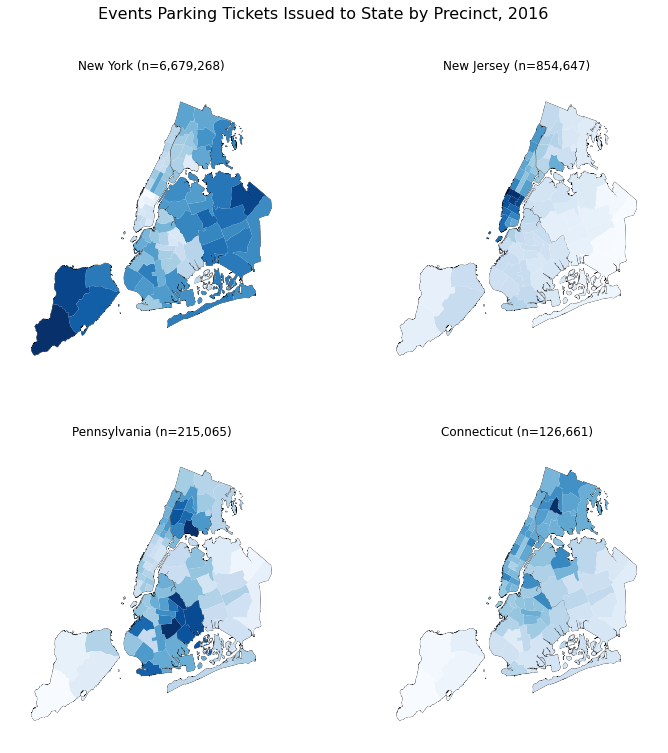

In [20]:
import geopandas as gpd
import geoplot as gplt
import geoplot.crs as gcrs
import matplotlib.pyplot as plt

# load the data
nyc_boroughs = gpd.read_file(gplt.datasets.get_path('nyc_boroughs'))
tickets = gpd.read_file(gplt.datasets.get_path('nyc_parking_tickets'))

proj = gcrs.AlbersEqualArea(central_latitude=40.7128, central_longitude=-74.0059)
def plot_state_to_ax(state, ax):
    gplt.choropleth(
        tickets.set_index('id').loc[:, [state, 'geometry']],
        hue=state, cmap='Blues',
        linewidth=0.0, ax=ax
    )
    gplt.polyplot(
        nyc_boroughs, edgecolor='black', linewidth=0.5, ax=ax
    )

f, axarr = plt.subplots(2, 2, figsize=(12, 12), subplot_kw={'projection': proj})

plt.suptitle('Events Parking Tickets Issued to State by Precinct, 2016', fontsize=16)

plt.subplots_adjust(top=0.90)

plot_state_to_ax('ny', axarr[0][0])
axarr[0][0].set_title('New York (n=6,679,268)')

plot_state_to_ax('nj', axarr[0][1])
axarr[0][1].set_title('New Jersey (n=854,647)')

plot_state_to_ax('pa', axarr[1][0])
axarr[1][0].set_title('Pennsylvania (n=215,065)')

plot_state_to_ax('ct', axarr[1][1])
axarr[1][1].set_title('Connecticut (n=126,661)')

plt.show()

**Your suggestions / code here:**